1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np

tau = 3.052 * 60
N_steps = 1000
luck = np.random.uniform(0,1,1000)
Ntl = 1000
Npb = 0
Tl = [1 for i in range(1000)]
Pb = [0 for i in range(1000)]
NTls =[]
NPbs = []

def prob(t) : 
    return 1 - 2**(-t/tau)

for t in range(N_steps) : 
    NTls.append(sum(Tl))
    NPbs.append(sum(Pb))
    for i,tl in enumerate(Tl) : 
        if (prob(t)>luck[i]) and (Tl[i]==1): 
            Tl[i] = 0
            Pb[i] = 1

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(np.arange(1000), NTls, lw=3)
plt.plot(np.arange(1000), NPbs, lw=3, c='r')
plt.show()

<Figure size 800x800 with 1 Axes>

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
Nalpha = 10**6
Z=79
e = 1.6*10**(-19)
E = 7.7 * 10**6 * e
eps = 8.854 * 10**(-12)
a0 = 5.3 * 10**(-11)
d_x = np.random.normal(0, a0/100, Nalpha)
d_y = np.random.normal(0, a0/100, Nalpha)
b = np.sqrt(d_x**2 + d_y**2)
theta = 2 * np.arctan(Z*e**2 / (2*np.pi*eps*E*b))

/home/philipp/anaconda3/envs/Vodafone/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


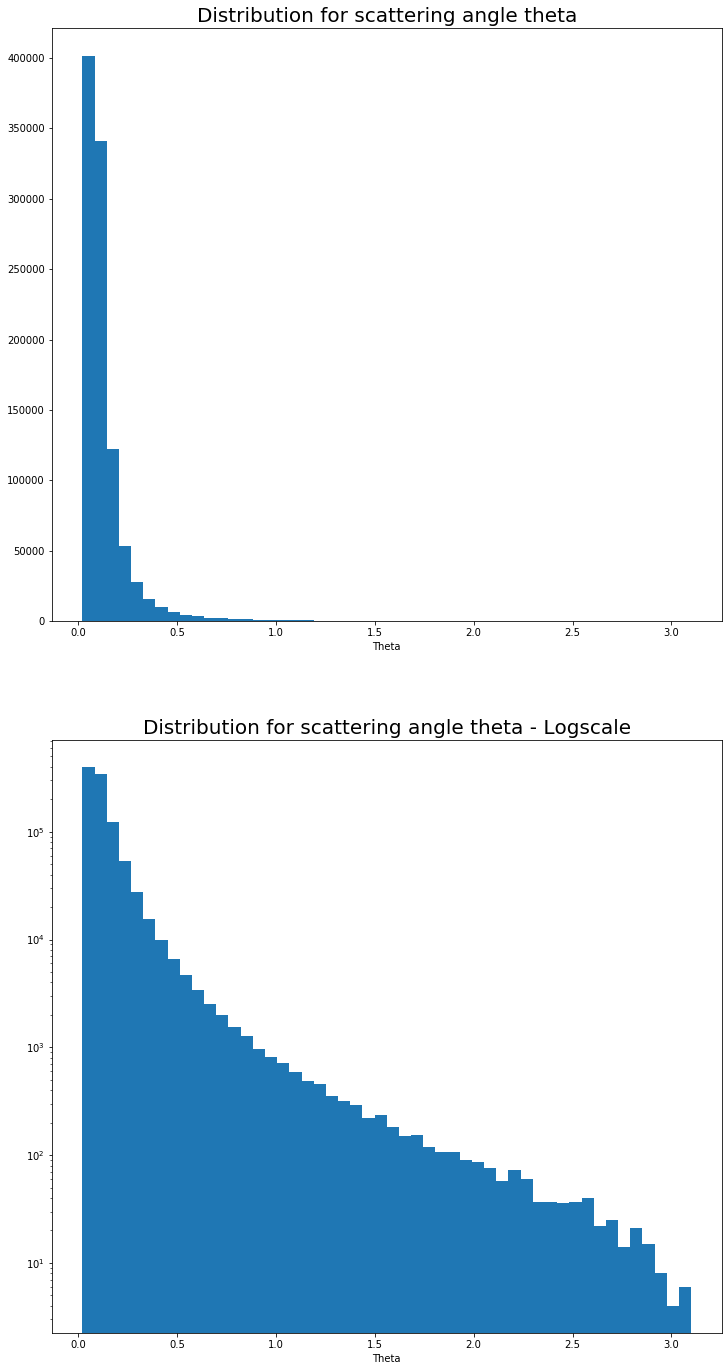

In [4]:
fig, ax = plt.subplots(2,1,figsize=(12,24))
ax[0].hist(theta, bins=50)
ax[0].set_title("Distribution for scattering angle theta", fontsize=20)
ax[0].set_xlabel("Theta")
ax[1].hist(theta, bins=50)
ax[1].set_title("Distribution for scattering angle theta - Logscale", fontsize=20)
ax[1].set_xlabel("Theta")
ax[1].set_yscale('log')
fig.show()

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

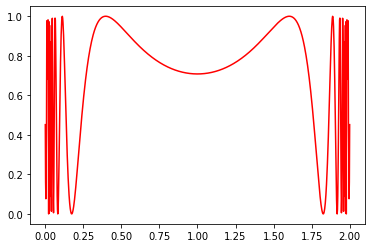

In [5]:
def f(x) : 
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')
plt.show()

In [6]:
# Hit and Miss Integration
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print("Integral: ",I)

Integral:  1.45264


In [7]:
# Mean value method

def mean_integrate(f,N,a,b) : 
    s = 0
    values = []
    for i in range(N) : 
        x = np.random.uniform(a,b)
        s += f(x)
        values.append(f(x))
        I = (float(b-a)/float(N)*s)
        err = (b-a)/np.sqrt(N)*np.std(np.array(values))
    return I, err
    
print("Integral and error: ", mean_integrate(f,1000,0,2))

Integral and error:  (1.4622188116443786, 0.01596446219666348)


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [8]:
def sphere(x) : 
    s=0
    for i in range(len(x)) : 
        s += x[i]**2
    if s < 1 : return 1
    else : return 0

__2D - Calculate pi__

In [9]:
N = 100000
dim=2
x = np.random.uniform(-1,1,dim)
s=0
for i in range(N) : 
    x = np.random.uniform(-1,1,dim)
    if sphere(x) : s+=1
        
print("Volume: ", (2**dim)*s/N)

Volume:  3.14744


__10D Sphere__

In [10]:
N = 100000
dim=10
x = np.random.uniform(-1,1,dim)
s=0
for i in range(N) : 
    x = np.random.uniform(-1,1,dim)
    if sphere(x) : s+=1
        
print("Volume: ", (2**dim)*s/N)

Volume:  2.4576


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [11]:
def f(x): 
    return ( (np.sqrt(x)) / (np.exp(x) + 1) )
def w(x): 
    return 1/np.sqrt(x)

In [13]:
N = int(1e4)
s = 0
for i in range(N) : 
    x = np.random.uniform(0,1)
    s += f(x)/w(x)
    
Iw, err= mean_integrate(w,N,0,1)
I = 1/float(N) * s * Iw

print("Integral: ", I)

Integral:  0.3315713237209119
